In [4]:
import os
import numpy as np
import pandas as pd
import scipy.stats as st
import numpy.random as rd
import matplotlib.pyplot as plt
from IPython.display import display
plt.style.use("ggplot")

%matplotlib inline

# Naive Bayes

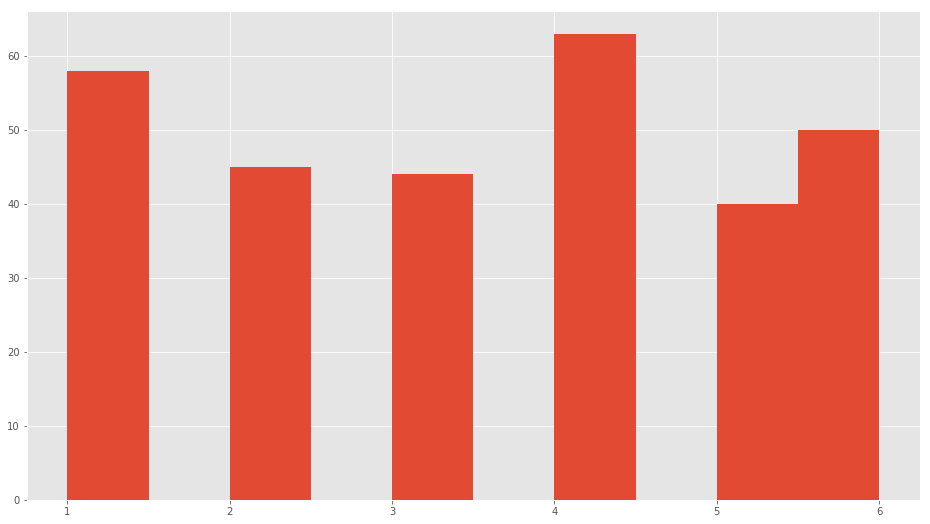

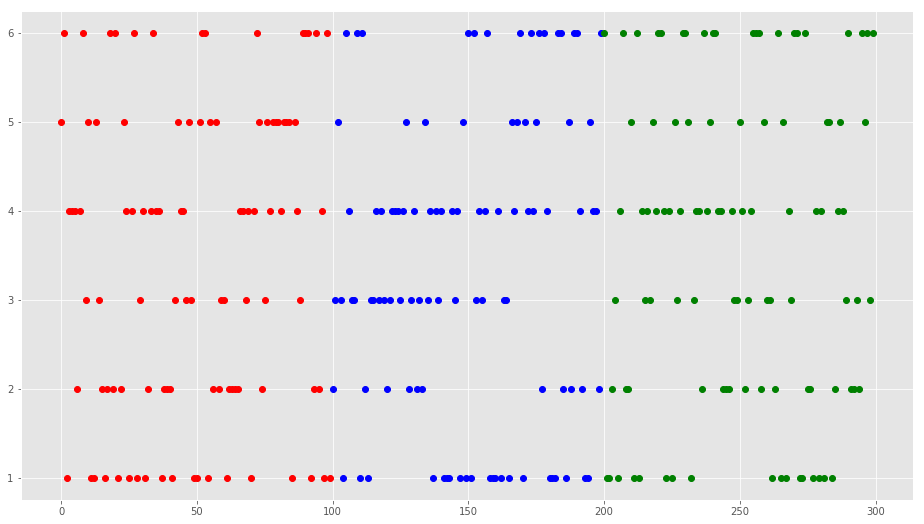

In [44]:
rd.seed(0)

dice1 = [1, 2, 3, 4, 5 ,6]
dice2 = [1, 2, 3]
dice3 = [4, 5, 6]

y1 = rd.choice(dice1, 100)
flag1 = np.array([2 for i in range(100)])
y2 = rd.choice(dice1, 100)
flag2 = np.array([1 for i in range(100)])
y3 = rd.choice(dice1, 100)
flag3 = np.array([3 for i in range(100)])

y = np.concatenate([y1, y2, y3])
flag = np.concatenate([flag1, flag2, flag3])
data = np.concatenate([y[:, np.newaxis], flag[:, np.newaxis]], axis=1)
org_data = pd.DataFrame(data)

plt.figure(figsize=(16, 9))
plt.hist(org_data[0])
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(org_data.loc[org_data[1]==2][0], "o", c="r")
plt.plot(org_data.loc[org_data[1]==1][0], "o", c="b")
plt.plot(org_data.loc[org_data[1]==3][0], "o", c="g")
plt.show()

In [60]:
user = list(y2.copy())
user_ = list([list(y1), list(y3)])

In [61]:
alpha = 1/2
p_u = []
p_u_ = []
for i in range(1, 7):
    p_u.append(user.count(i))
    p_u_.append(user_[0].count(i))
p_u = (np.array(p_u) + alpha)/(100 + alpha * 6)
p_u_ = (np.array(p_u_) + alpha)/(100 + alpha * 3)

In [62]:
P_u = 1
P_u_ = 1
for u, u_ in zip(user, user_[0]):
    P_u *= p_u[u-1]
    P_u_ *= p_u_[u_-1]

In [63]:
Score = P_u_ / P_u

In [64]:
print(Score)

0.251237825898


In [65]:
p_u

array([ 0.2184466 ,  0.11165049,  0.18932039,  0.22815534,  0.10194175,
        0.15048544])

In [66]:
p_u_

array([ 0.19211823,  0.18226601,  0.11330049,  0.20197044,  0.18226601,
        0.14285714])